# Interactive gaussian anamorphosis modeling with hermite polynomials





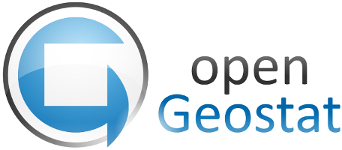

In [1]:
#general imports
import pygslib    
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#make the plots inline
#matplotlib notebook 
%matplotlib inline 

In [2]:
#get the data in gslib format into a pandas Dataframe
clusterdata= pygslib.gslib.read_gslib_file('../datasets/cluster.dat') 
clusterdata.head()

,Xlocation,Ylocation,Primary,Secondary,Declustering Weight
0,39.5,18.5,0.06,0.22,1.619
1,5.5,1.5,0.06,0.27,1.619
2,38.5,5.5,0.08,0.40,1.416
3,20.5,1.5,0.09,0.39,1.821
4,27.5,14.5,0.09,0.24,1.349


## Interactive anamorphosis modeling

Raw Variance 22.08676848118367
Variance from PCI 22.08473748257782
zamin 0.2502111784408812
zamax 53.78127468861693
yamin -0.8611722344468893
yamax 2.945589117823565
zpmin 0.060050219213478785
zpmax 58.23083435514754
ypmin -2.1114222844568915
ypmax 2.945589117823565


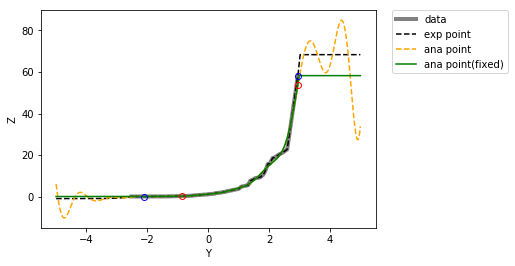

In [3]:
# Fit anamorphosis by changing, zmax, zmin, and extrapolation function
PCI, H, raw, zana, gauss, z, P, raw_var, PCI_var, fig1 = pygslib.nonlinear.anamor(
                         z = clusterdata['Primary'], 
                         w = clusterdata['Declustering Weight'], 
                         zmin = clusterdata['Primary'].min()-1, 
                         zmax = clusterdata['Primary'].max()+10,
                         zpmin = None, zpmax = None,
                         ymin=-5, ymax=5,
                         ndisc = 5000,
                         ltail=1, utail=4, ltpar=1, utpar=1.5, K=40)

In [4]:
PCI

array([ 2.52812133e+00, -3.22060582e+00,  2.70871707e+00, -1.75777581e+00,
        7.60144341e-01, -6.83010290e-02, -3.33893279e-01,  3.83739920e-01,
       -1.59920218e-01, -8.42077407e-02,  2.12036245e-01, -1.68314955e-01,
       -3.82409548e-02,  2.05703432e-01, -1.30266196e-01, -9.46794295e-02,
        1.91338746e-01, -4.99191256e-02, -1.46811843e-01,  1.47621016e-01,
        4.63107060e-02, -1.69567108e-01,  5.58812457e-02,  1.26172878e-01,
       -1.22915700e-01, -4.71754791e-02,  1.40877866e-01, -3.52655448e-02,
       -1.14695222e-01,  9.68898110e-02,  6.03334492e-02, -1.25322755e-01,
        2.91910348e-03,  1.19508124e-01, -5.81750902e-02, -8.66307048e-02,
        9.41379802e-02,  3.82250861e-02, -1.06024440e-01,  1.33869667e-02,
        9.48554722e-02])

## Block support transformation

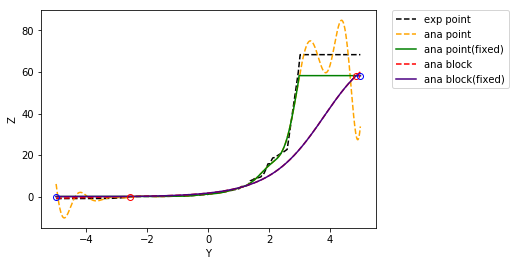

In [5]:
ZV, PV, fig2 = pygslib.nonlinear.anamor_blk( PCI, H, r = 0.7, gauss = gauss, Z = z,
                  ltail=1, utail=1, ltpar=1, utpar=1,
                  raw=raw, zana=zana)

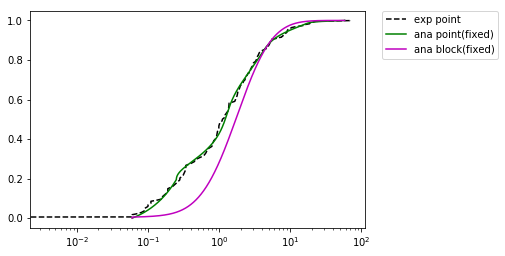

In [6]:
# the pair ZV, PV define the CDF in block support
# let's plot the CDFs
plt.semilogx (raw,P, '--k', label = 'exp point' ) 
plt.semilogx (z,P, '-g', label = 'ana point(fixed)' )  #point support (from gaussian anamorphosis)
plt.semilogx (ZV, PV, '-m',  label = 'ana block(fixed)')  #block support 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Grade Tonnage curves

In [7]:
cutoff = np.arange(0,10, 0.1)
tt = []
gg = []
label = []

# calculate GTC from gaussian in block support 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=ZV, p=PV, varred = 1, ivtyp = 0, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('DGM with block support')

# calculate GTC using undirect lognormal 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 0.4, ivtyp = 2, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Indirect Lognormal Correction')

# calculate GTC using affine 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 0.4, ivtyp = 1, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Affine Correction')

# calculate GTC in point support  
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 1, ivtyp = 2, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Point (anamorphosis without support effect)')

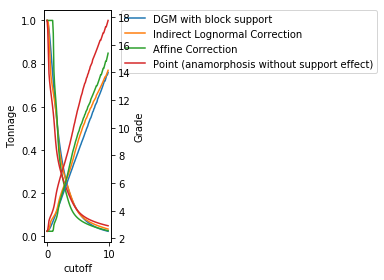

In [8]:
fig = pygslib.nonlinear.plotgt(cutoff = cutoff, t = tt, g = gg, label = label)

## Anamorphosis modeling from raw Z,Y pairs

Raw Variance 22.08676848118367
Variance from PCI 16.6741848707983


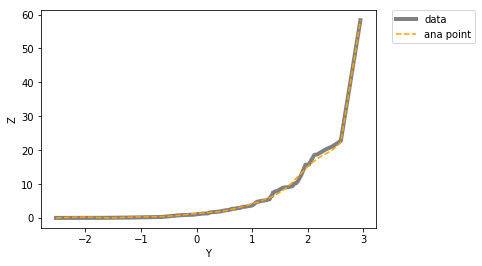

In [9]:
PCI, H, raw, zana, gauss, raw_var, PCI_var, fig3 = pygslib.nonlinear.anamor_raw(
                         z = clusterdata['Primary'], 
                         w = clusterdata['Declustering Weight'], 
                         K=40)